<h1><center>Multiple Linear Regression</center></h1>

<h4>About this Notebook</h4>
In this notebook, we learn how to use scikit-learn to implement Multiple linear regression. We download a dataset that is related to fuel consumption and Carbon dioxide emission of cars. Then, we split our data into training and test sets, create a model using training set, Evaluate your model using test set, and finally use model to predict unknown value

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df2 = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
df2.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


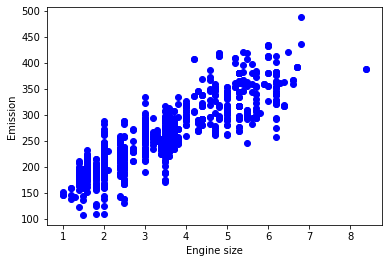

In [5]:
plt.scatter(df2.ENGINESIZE, df2.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

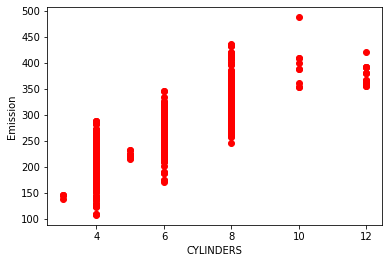

In [6]:
plt.scatter(df2.CYLINDERS, df2.CO2EMISSIONS,  color='red')
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")
plt.show()

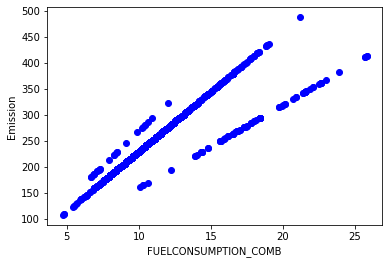

In [11]:
plt.scatter(df2.FUELCONSUMPTION_COMB, df2.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

In [12]:
X = df2[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB"]]
Y = df2['CO2EMISSIONS']

# Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing.

In [17]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])




number of test samples : 214
number of training samples: 853


In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lm=LinearRegression()

In [20]:
lm.fit(x_train, y_train)

/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/base.py:503: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
Yhat=lm.predict(x_train)
Yhat[0:5]   

array([261.93561166, 328.6896598 , 214.12622132, 311.16146053,
       289.26824273])

In [22]:
lm.intercept_

65.17950048137254

In [23]:
lm.coef_

array([11.56295409,  6.91231122,  9.72527271])

In [24]:
lm.fit(x_train, y_train)
# Find the R^2
print('The R-square is: ', lm.score(x_train, y_train))

The R-square is:  0.8635184270333695


In [25]:
Yhat=lm.predict(x_test)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [257.0729753  193.62675365 198.61947156 184.0315625 ]


In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
mse = mean_squared_error(y_test, Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  546.2591396903438


In [28]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lm.score(x_train, y_train))

Variance score: 0.86


<h2>Cross-validation Score</h2>

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
Rcross = cross_val_score(lm, x_train, y_train, cv=4)

In [31]:
Rcross

array([0.86776793, 0.87965654, 0.85586517, 0.82657415])

In [32]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.8574659482793302 and the standard deviation is 0.019719396799374303


In [33]:
yhat_train = lm.predict(x_train)
yhat_train[0:5]

array([261.93561166, 328.6896598 , 214.12622132, 311.16146053,
       289.26824273])

In [35]:
print("Predicted values:", yhat_train[0:4])
print("True values:", y_train[0:4].values)

Predicted values: [261.93561166 328.6896598  214.12622132 311.16146053]
True values: [285 317 218 320]


In [34]:
yhat_test = lm.predict(x_test)
yhat_test[0:5]

array([257.0729753 , 193.62675365, 198.61947156, 184.0315625 ,
       308.84886971])

In [36]:
print("Predicted values:", yhat_test[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [257.0729753  193.62675365 198.61947156 184.0315625 ]
True values: [274 200 196 161]


In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [39]:
mse = mean_squared_error(y_test, yhat_test)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  546.2591396903438


In [38]:
mae = mean_absolute_error(y_test, yhat_test)
print('The mean absolute error of price and predicted value is: ', mae)

The mean absolute error of price and predicted value is:  16.646827998823227


In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [45]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('CO2Emissions')
    plt.ylabel('Proportion of engine')

    plt.show()
    plt.close()

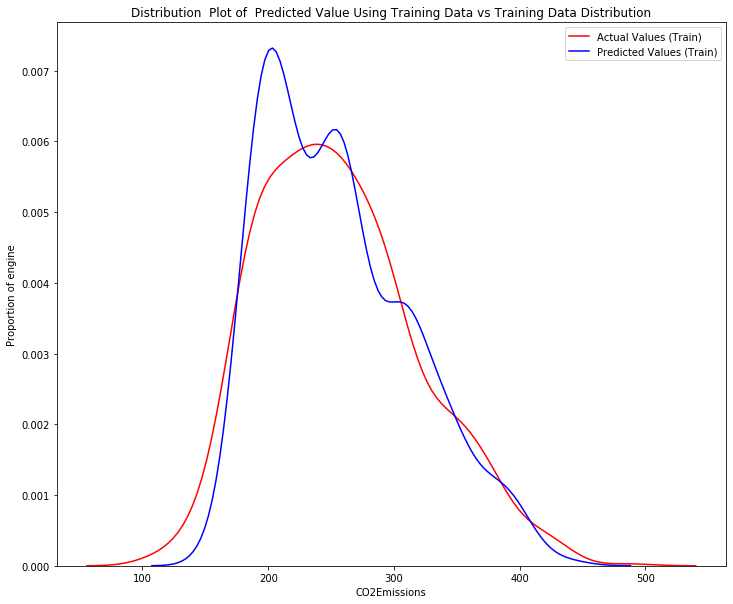

In [46]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

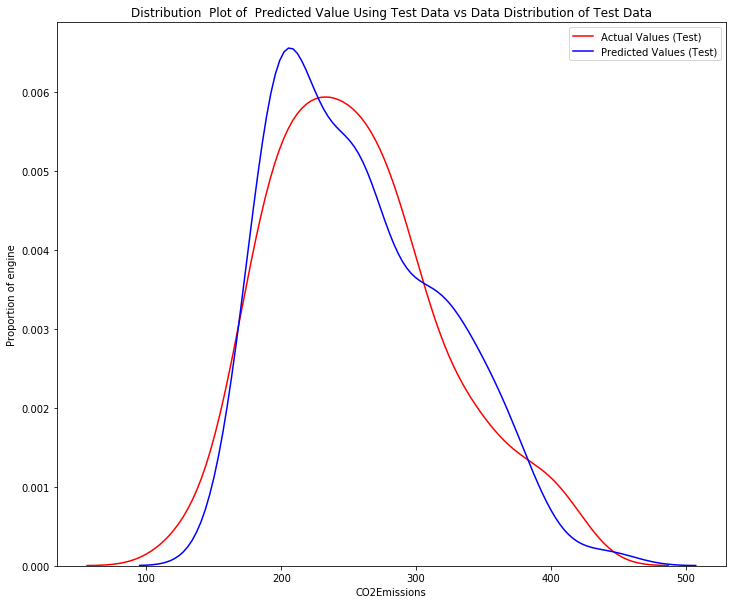

In [47]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)